In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import missingno as msno

In [8]:
import statsmodels.api as sm

In [9]:
import statistics

In [10]:
from scipy import stats

In [11]:
import pylab

In [12]:
from pylab import rcParams

In [13]:
from scipy.stats import chisquare

In [14]:
from scipy.stats import chi2_contingency

In [15]:
import sklearn

In [16]:
from sklearn import preprocessing

In [17]:
from sklearn import metrics

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import classification_report

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('churn_clean.csv')

In [24]:
#Display the data set so that we can get a quick overview assessment.
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [25]:
#So there are 10,000 rows and 50 columns.
#Let's move on and list the columns
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [26]:
#This will allow us to get a quick scan of each variable in the data set
#Now, we will move onto cleaning the data set
#Let's drop some variables that are not pertinent to our analysis
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
        'Marital', 'Gender',
       'Email', 'Contacts', 'DeviceProtection', 'TechSupport', 'OnlineSecurity',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple',  'OnlineBackup',
     'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [27]:
#Next we will run the code to check for nulls
#This allow us to look at how many null values there are in the data set
df.isnull().sum()

Children                0
Age                     0
Income                  0
Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

<AxesSubplot:>

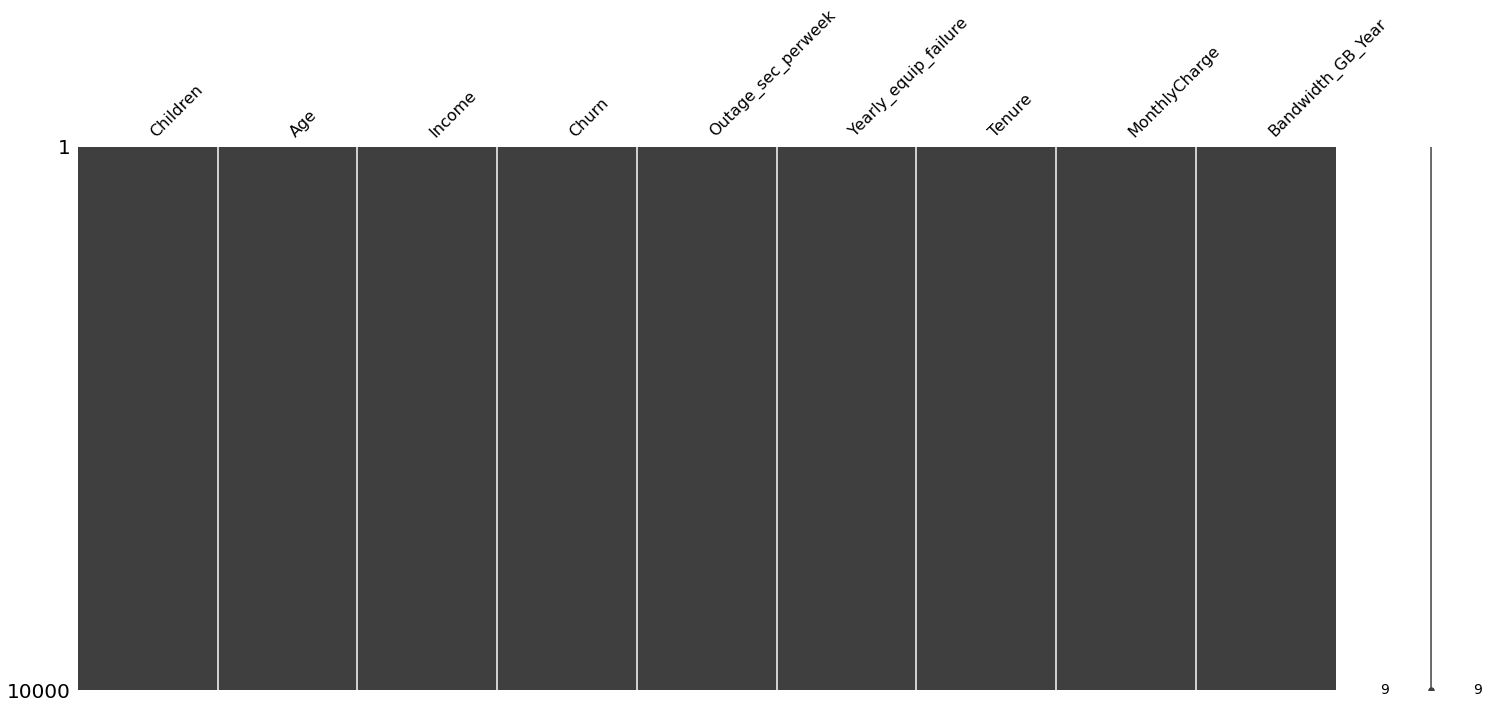

In [28]:
#Visualize nulls
msno.matrix(df)

In [29]:
#So according to the code we ran, there are no missing values.

In [30]:
#Now we will check for duplicates

In [31]:
df.duplicated().sum()

0

In [32]:
#Looks like there are no duplicates
#Moving on, we will examine the data set's statistics
df.describe()

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280,290.160419,7158.981530


In [33]:
#Counting churn
df['Churn']. value_counts(normalize=True)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

In [34]:
df.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [35]:
#Now we will turn all the Yes/No values into dummy values
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [36]:
#Next we will drop the categorical variable before we turned it into dummy values
df = df.drop(columns=['Churn'])

In [37]:
#View new column data
df.columns
print(df)

      Children  Age    Income  Outage_sec_perweek  Yearly_equip_failure  \
0            0   68  28561.99            7.978323                     1   
1            1   27  21704.77           11.699080                     1   
2            4   50   9609.57           10.752800                     1   
3            1   48  18925.23           14.913540                     0   
4            0   83  40074.19            8.147417                     1   
...        ...  ...       ...                 ...                   ...   
9995         3   23  55723.74            9.415935                     0   
9996         4   48  34129.34            6.740547                     0   
9997         1   48  45983.43            6.590911                     0   
9998         1   39  16667.58           12.071910                     0   
9999         1   28   9020.92           11.754720                     0   

         Tenure  MonthlyCharge  Bandwidth_GB_Year  DummyChurn  
0      6.795513     172.455519     

<AxesSubplot:xlabel='Age'>

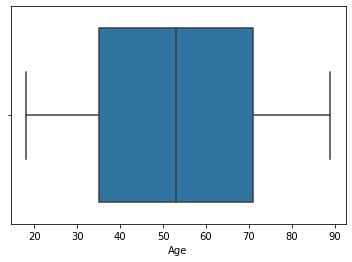

In [38]:
#Checking outliers
sns.boxplot('Age', data = df)

<AxesSubplot:xlabel='Tenure'>

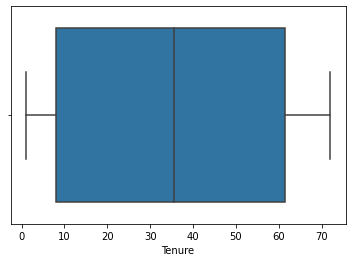

In [39]:
sns.boxplot('Tenure', data = df)

<AxesSubplot:xlabel='MonthlyCharge'>

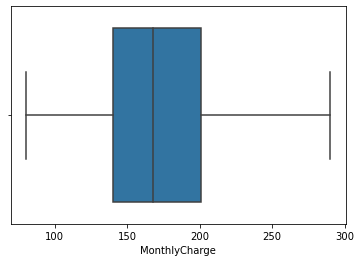

In [40]:
sns.boxplot('MonthlyCharge', data = df)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

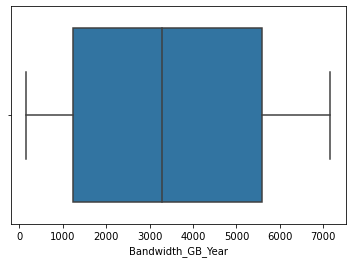

In [41]:
sns.boxplot('Bandwidth_GB_Year', data = df)

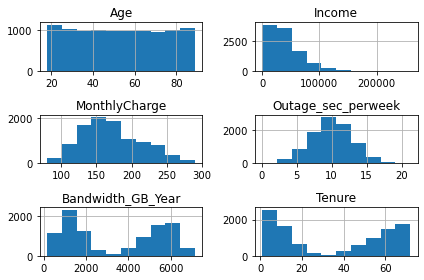

In [42]:
#Univariate Statistics
#Histograms for distributions
df[['Age', 'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year', 'Tenure']].hist()
plt.tight_layout()

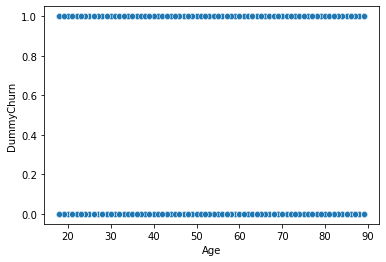

In [43]:
#Now we will do bivariate statistics of the explanatory variables with our target variable
#To do that, we're going to use a scatterplot
sns.scatterplot(x=df['Age'], y=df['DummyChurn'])
plt.show()

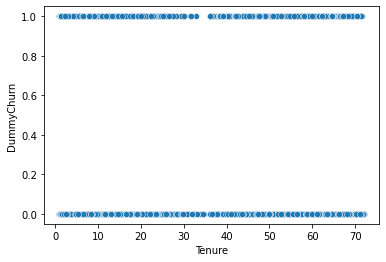

In [44]:
sns.scatterplot(x=df['Tenure'], y=df['DummyChurn'])
plt.show()

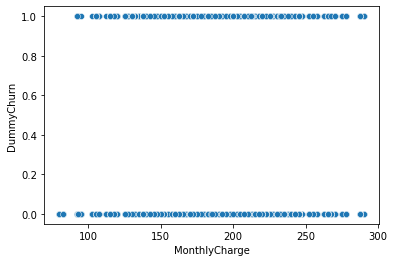

In [45]:
sns.scatterplot(x=df['MonthlyCharge'], y=df['DummyChurn'])
plt.show()

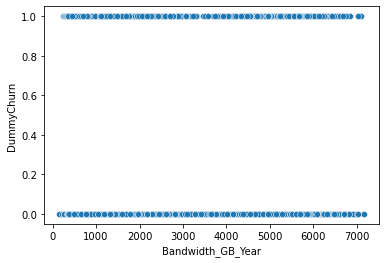

In [46]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], y=df['DummyChurn'])
plt.show()

In [47]:
#So now that we have prepared our data, we will next extract it
df.to_csv('clean_churn.csv')

In [48]:
#Load clean data set back in
clean_churn = pd.read_csv('clean_churn.csv')

In [49]:
#View columns
clean_churn.columns

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'DummyChurn'],
      dtype='object')

In [50]:
#Initial Logistic Regression Model
clean_churn['Intercept'] = 1
logistic_model = sm.Logit(clean_churn['DummyChurn'], clean_churn[['Children', 'Age', 
                                                              'Income', 'Tenure', 'MonthlyCharge',
                                                               'Bandwidth_GB_Year','Yearly_equip_failure', 
                                                              'Outage_sec_perweek', 'Intercept']]).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.319831
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.4469
Time:                        18:23:14   Log-Likelihood:                -3198.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0983      0.015     -6.346      0.000      -0.129      -0.068

In [51]:
#Reduced Logistic Regression Model
clean_churn['Intercept'] = 1
logistic_model = sm.Logit(clean_churn['DummyChurn'], clean_churn[['Children', 'Age', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Intercept']]).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.319856
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.4468
Time:                        18:23:14   Log-Likelihood:                -3198.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.0981      0.015     -6.339      0.000      -0.128      -0.068
Age     

In [52]:
#R-squared is practically the same 
#So, the goodness of fit is the same for initial and reduced models.

CONFUSION MATRIX

In [53]:
#Now we will create a confusion matrix for the data
con_matrix = pd.read_csv('clean_churn.csv')
X = con_matrix.iloc[:, 1:-1].values
Y = con_matrix.iloc[:, -1].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [55]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1309  177]
 [ 176  338]]


In [58]:
y_predict_test = classifier.predict(X_test)
new_matrix=confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

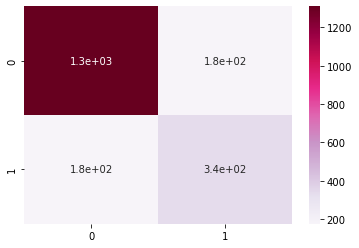

In [59]:
sns.heatmap(new_matrix, cmap='PuRd', annot=True)

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1486
           1       0.66      0.66      0.66       514

    accuracy                           0.82      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.82      0.82      0.82      2000

